🌍 Air Quality Analysis & Prediction using Machine Learning
Project Objective

Analyze air quality patterns and predict average pollutant concentration using Exploratory Data Analysis (EDA) and a Machine Learning model (Random Forest Regression).

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score


2. Load Dataset

Purpose: Load the air quality dataset and standardize column names for consistency and easier processing.

In [8]:

# Load dataset

df = pd.read_csv(
    r"C:\Users\amrit\OneDrive\Desktop\data set for project\REAL TIME AIR QUALITY FROM VARIOUS LOCATION.csv"
)

# Standardize column names
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

# View first few rows
df.head()

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Andhra_Pradesh,Visakhapatnam,"GVM Corporation, Visakhapatnam - APPCB",15-11-2025 17:00,17.720000,83.300000,PM2.5,135.0,310.0,233.0
1,India,Andhra_Pradesh,Visakhapatnam,"GVM Corporation, Visakhapatnam - APPCB",15-11-2025 17:00,17.720000,83.300000,PM10,126.0,289.0,163.0
2,India,Andhra_Pradesh,Visakhapatnam,"GVM Corporation, Visakhapatnam - APPCB",15-11-2025 17:00,17.720000,83.300000,NO2,22.0,157.0,63.0
3,India,Andhra_Pradesh,Visakhapatnam,"GVM Corporation, Visakhapatnam - APPCB",15-11-2025 17:00,17.720000,83.300000,CO,2.0,48.0,24.0
4,India,Arunachal_Pradesh,Naharlagun,"Naharlagun, Naharlagun - APSPCB",15-11-2025 17:00,27.103358,93.679645,PM10,25.0,142.0,68.0


3. Data Cleaning

Purpose: Remove records with missing target values to ensure accurate model training.

In [9]:
df = df.dropna(subset=["pollutant_avg"])

4. Feature Selection & Target Definition

Purpose: Select relevant input features and define the prediction target.

Target Variable (y): pollutant_avg

Features (X): Location details, geospatial coordinates, pollutant statistics

In [10]:
y = df["pollutant_avg"]


# Define features
X = df[[
"country",
"state",
"city",
"station",
"latitude",
"longitude",
"pollutant_id",
"pollutant_min",
"pollutant_max"
]]


# Convert categorical variables to numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

5. Exploratory Data Analysis (EDA)

EDA helps understand pollution trends, distributions, and relationships between variables.

5.1 Feature Distributions

Purpose: Visualize the distribution of numeric variables using histograms.

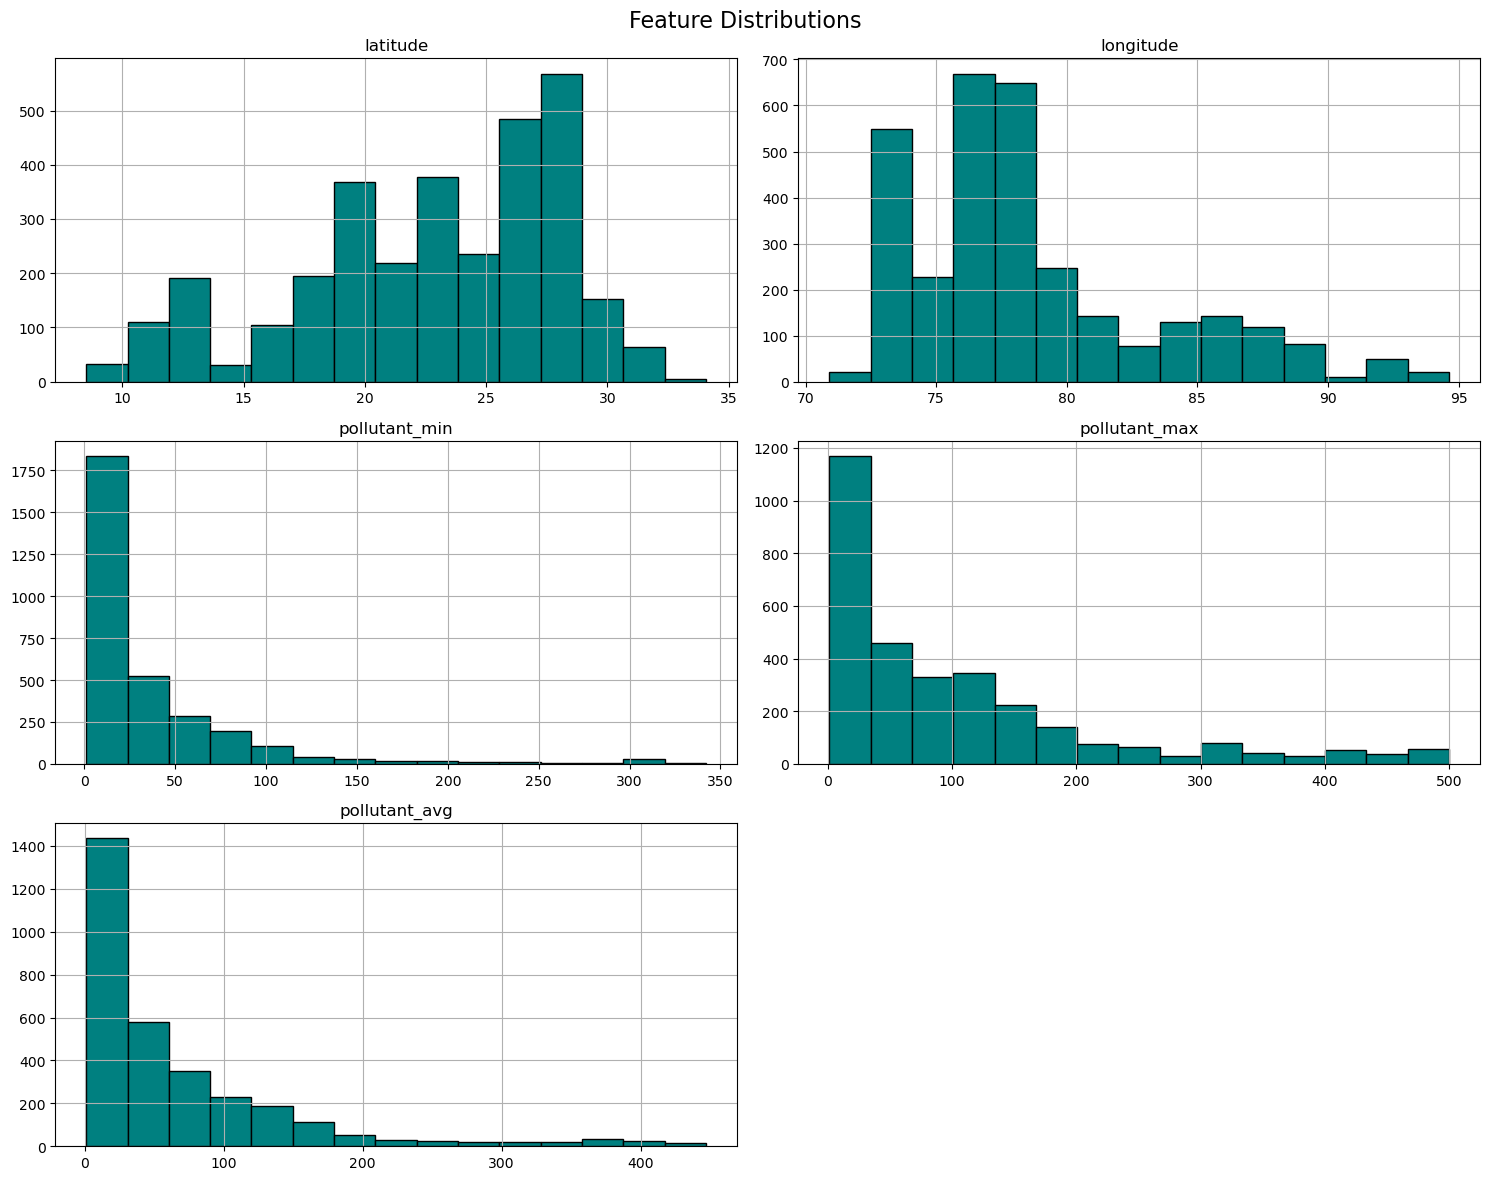

In [11]:
numeric_features = [
"latitude",
"longitude",
"pollutant_min",
"pollutant_max",
"pollutant_avg"
]


df[numeric_features].hist(
figsize=(15, 12),
bins=15,
color="teal",
edgecolor="black"
)


plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

5.2 Feature Correlation Heatmap

Purpose: Identify relationships between numeric air quality variables.

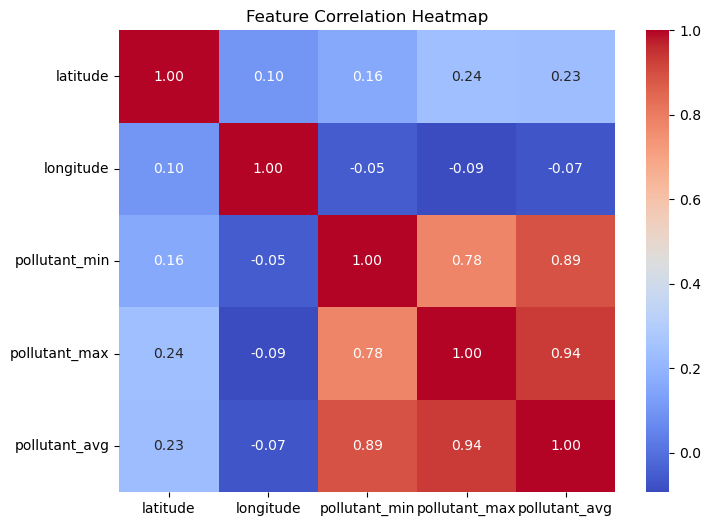

In [12]:
corr = df[numeric_features].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(
corr,
annot=True,
cmap="coolwarm",
fmt=".2f"
)


plt.title("Feature Correlation Heatmap")
plt.show()

5.3 Pollutant Min vs Max Comparison

Purpose: Compare average minimum and maximum pollutant levels for each pollutant type.

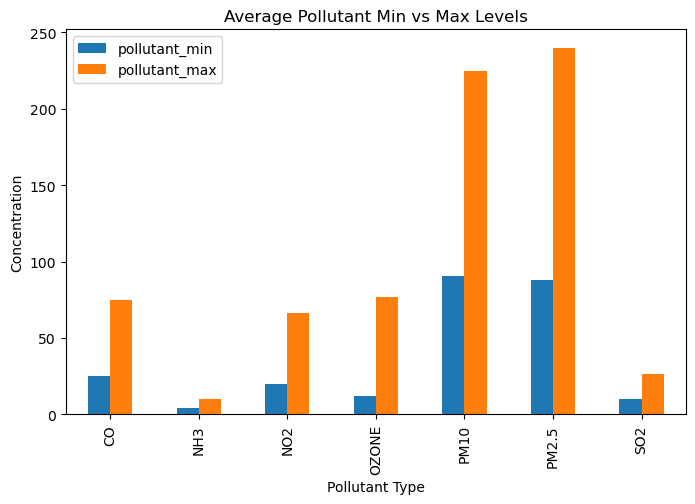

In [13]:
pollutant_range = df.groupby("pollutant_id")[["pollutant_min", "pollutant_max"]].mean()


pollutant_range.plot(kind="bar", figsize=(8, 5))
plt.title("Average Pollutant Min vs Max Levels")
plt.xlabel("Pollutant Type")
plt.ylabel("Concentration")
plt.show()

5.4 City-wise Pollution Analysis

Purpose: Identify cities with the highest average pollution levels

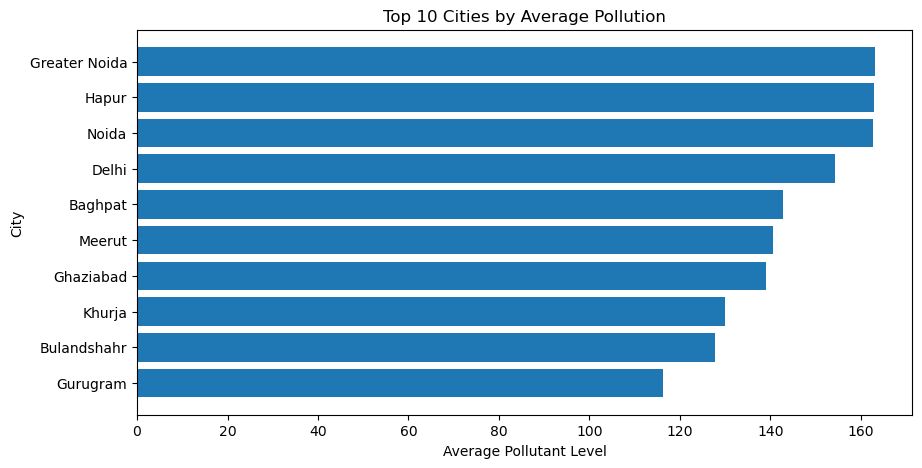

In [14]:
top_cities = (
df.groupby("city")["pollutant_avg"]
.mean()
.sort_values(ascending=False)
.head(10)
)


plt.figure(figsize=(10, 5))
plt.barh(top_cities.index, top_cities.values)
plt.gca().invert_yaxis()
plt.title("Top 10 Cities by Average Pollution")
plt.xlabel("Average Pollutant Level")
plt.ylabel("City")
plt.show()